In [1]:
#import libraries 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [0]:
#download the dataset
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [0]:
#dataset is obtain handwriting numbers from 0-9
numbers=10

#convert class vector to binary class matrix
y_train=keras.utils.to_categorical(y_train, numbers)

y_test=keras.utils.to_categorical(y_test, numbers)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


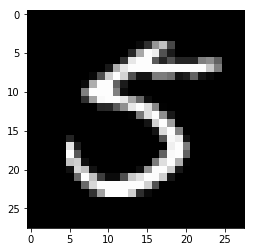

In [4]:
i=random.randint(0, 60000)
plt.imshow(x_train[i], cmap="gray")
print(y_train[1])


In [0]:
#normalize the array
x_train=keras.utils.normalize(x_train, axis=1)
x_test=keras.utils.normalize(x_test, axis=1)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


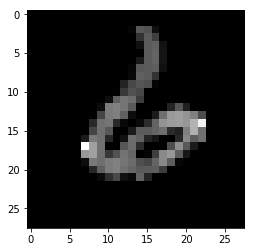

In [6]:
#after normalization the brightness reduces
i=random.randint(0, 40000)
plt.imshow(x_train[i], cmap="gray")
print(y_train[1])

In [0]:
#reshape the array from (60000, 28, 28) to (60000, 28, 28, 1)
x_train=x_train.reshape(60000,28,28,1).astype("float32")
x_test=x_test.reshape(10000,28,28,1).astype("float32")


In [10]:
#build the Sequential model by using the convolutional and the pooling layers
model= Sequential()
model.add(Conv2D(16, kernel_size=[3,3], input_shape=[28,28,1], activation="relu"))
model.add(Conv2D(32, kernel_size=[3,3], activation="relu"))
model.add(MaxPooling2D(pool_size=3, strides=None, padding='valid', data_format=None))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="relu"))
model.add(keras.layers.Activation("softmax"))

W0729 13:02:19.198422 140514857224064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 13:02:19.219063 140514857224064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 13:02:19.224170 140514857224064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 13:02:19.255557 140514857224064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0729 13:02:19.259181 140514857224064 deprecation_wrapp

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.adam(), metrics=["accuracy"])

W0729 13:02:20.342853 140514857224064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 13:02:20.354821 140514857224064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
batch_size=64
model.fit(x_train, y_train, batch_size=batch_size, epochs=10, verbose=1, validation_data=(x_test, y_test), callbacks=None)

score=model.evaluate(x_test, y_test, verbose=0)
print("Test loss{0}".format(score[0]))
print("Test accuracy{0}".format(score[1]))

W0729 13:02:22.907040 140514857224064 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.3511 - acc: 0.8930 - val_loss: 0.0746 - val_acc: 0.9774
Epoch 2/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1197 - acc: 0.9648 - val_loss: 0.0498 - val_acc: 0.9850
Epoch 3/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0853 - acc: 0.9744 - val_loss: 0.0393 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0734 - acc: 0.9778 - val_loss: 0.0375 - val_acc: 0.9880
Epoch 5/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0617 - acc: 0.9811 - val_loss: 0.0335 - val_acc: 0.9905
Epoch 6/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0569 - acc: 0.9825 - val_loss: 0.0298 - val_acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0507 - acc: 0.9847 - val_loss: 0.